# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd

In [2]:
data_path = '/datasets/'

In [3]:
orders_df = pd.read_csv(data_path + 'instacart_orders.csv', ';')
print(orders_df.info())
print(orders_df.min())
print(orders_df.max())
print(orders_df.isnull().sum())

null_orders_df=orders_df.fillna('unknown')

duplicated_orders_df=orders_df.duplicated()
print(duplicated_orders_df.sum())
new_orders_df=orders_df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
order_id                  4.0
user_id                   2.0
order_number              1.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64
order_id                  3421079.0
user_id                    206209.0
order_number                  100.0
order_dow                       6.0
order_hour_of_day              23.0
days_since_prior_order     

In [4]:
products_df = pd.read_csv(data_path + 'products.csv', ';')
print(products_df.info())
print(products_df.min())
print(products_df.max())
print(products_df.isnull().sum())
new_products_df = products_df.dropna()
print(new_products_df.isnull().sum())
duplicated_products_df = products_df.duplicated()
print(duplicated_products_df.sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
product_id       1
aisle_id         1
department_id    1
dtype: int64
product_id       49694
aisle_id           134
department_id       21
dtype: int64
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
0


In [5]:
aisles_df = pd.read_csv(data_path + 'aisles.csv',';')
print(aisles_df.info())
print(aisles_df.min())
print(aisles_df.max())
print(aisles_df.isnull().sum())
duplicate_aisles_df = aisles_df.duplicated()
print(duplicate_aisles_df.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
aisle_id                         1
aisle       air fresheners candles
dtype: object
aisle_id       134
aisle       yogurt
dtype: object
aisle_id    0
aisle       0
dtype: int64
0


In [6]:
departments_df = pd.read_csv(data_path + 'departments.csv', ';')
print(departments_df.info())
print(departments_df.min())
print(departments_df.max())
print(departments_df.isnull().sum())
duplicate_aisles_df = aisles_df.duplicated()
print(duplicate_aisles_df.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
department_id          1
department       alcohol
dtype: object
department_id        21
department       snacks
dtype: object
department_id    0
department       0
dtype: int64
0


In [7]:
order_products_df = pd.read_csv(data_path + 'order_products.csv', ';')
print(order_products_df.info())
print(order_products_df.min())
print(order_products_df.max())
print(order_products_df.isnull().sum())
new_order_products_df = order_products_df.dropna()
print(new_order_products_df.isnull().sum())
duplicate_order_products_df = order_products_df.duplicated()
print(duplicate_order_products_df.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64
order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
0


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
los datos en los archivos estan serparados por ';' no por ','. Solo hay que ajustar el separador al leerlos.
En orders_df los duplicados están en la columna de days_since_prior_order y considerando que puede haber valores vacios en esa colunda dado que puede haber clientes que hayan hecho solo un pedido sin hacer un subsecuente.
Solo se encontraron valores duplicados en orders_df, considerando que esta tabla tiene la columna de order_id, sabemos que no puede haber una misma orden duplicada por lo que los retiramos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - ¡Excelente inicio! Realizaste una revisión clara e identificaste correctamente la estructura de los datos, incluyendo la detección de duplicados y valores nulos. Esto sentará una base sólida para las etapas siguientes del proyecto. Continúa con este enfoque ordenado y crítico.
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos
Los datos en los archivos estan serparados por ';' no por ','. Solo hay que ajustar el separador al leerlos.
En orders_df los duplicados están en la columna de days_since_prior_order y considerando que puede haber valores vacios en esa colunda dado que puede haber clientes que hayan hecho solo un pedido sin hacer un subsecuente.
Solo se encontraron valores duplicados en orders_df, considerando que esta tabla tiene la columna de order_id, sabemos que no puede haber una misma orden duplicada por lo que los retiramos

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).
En orders_df los duplicados están en la columna de days_since_prior_order y considerando que puede haber valores vacios en esa colunda dado que puede haber clientes que hayan hecho solo un pedido sin hacer un subsecuente. Solo se encontraron valores duplicados en orders_df, considerando que esta tabla tiene la columna de order_id, sabemos que no puede haber una misma orden duplicada por lo que los retiramos

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
orders_df = pd.read_csv(data_path + 'instacart_orders.csv', ';')
print(orders_df.info())
print(orders_df.min())
print(orders_df.max())
print(orders_df.isnull().sum())

duplicated_orders_df=orders_df.duplicated()
print(duplicated_orders_df.sum())
new_orders_df=orders_df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
order_id                  4.0
user_id                   2.0
order_number              1.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64
order_id                  3421079.0
user_id                    206209.0
order_number                  100.0
order_dow                       6.0
order_hour_of_day              23.0
days_since_prior_order     

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Sí hay quince líneas duplicadas, considerando que esta tabla tiene la columna de order_id, no debería haber duplicados ya que el identificador de una orden no puede ser igual al de otra. 

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday2am_orders = new_orders_df[(new_orders_df['order_dow'] == 3)&(new_orders_df['order_hour_of_day'] == 2)]
print(wednesday2am_orders)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

In [10]:
# Elimina los pedidos duplicados
duplicated_orders_df=orders_df.duplicated()
print(duplicated_orders_df.sum())
new_orders_df=orders_df.drop_duplicates()

15


In [11]:
# Vuelve a verificar si hay filas duplicadas
print(new_orders_df)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicated_order_id=orders_df.duplicated('order_id')
print(duplicated_order_id)

0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos
En orders_df los duplicados están en la columna de days_since_prior_order y considerando que puede haber valores vacios en esa colunda dado que puede haber clientes que hayan hecho solo un pedido sin hacer un subsecuente. Solo se encontraron valores duplicados en orders_df, considerando que esta tabla tiene la columna de order_id, sabemos que no puede haber una misma orden duplicada por lo que los retiramos

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
products_df = pd.read_csv(data_path + 'products.csv', ';')
print(products_df.info())
print(products_df.min())
print(products_df.max())
print(products_df.isnull().sum())
new_products_df = products_df.dropna()
print(new_products_df.isnull().sum())
duplicated_products_df = products_df.duplicated()
print(duplicated_products_df.sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
product_id       1
aisle_id         1
department_id    1
dtype: int64
product_id       49694
aisle_id           134
department_id       21
dtype: int64
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
duplicated_departments=products_df.duplicated('department_id')
print(duplicated_departments)

0        False
1        False
2        False
3        False
4         True
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Length: 49694, dtype: bool


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products_df['product_name']=products_df['product_name'].str.upper()
print(products_df.head())
duplicados_products_df=products_df.duplicated('product_name')
print(duplicados_products_df)

   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Length: 49694, dtype: bool


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
departments_df = pd.read_csv(data_path + 'departments.csv', ';')
print(departments_df.info())
print(departments_df.min())
print(departments_df.max())
print(departments_df.isnull().sum())
duplicate_aisles_df = aisles_df.duplicated()
print(duplicate_aisles_df.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
department_id          1
department       alcohol
dtype: object
department_id        21
department       snacks
dtype: object
department_id    0
department       0
dtype: int64
0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
products_df['product_id']=products_df['product_id']
print(products_df.head())
duplicados_product_id_df=products_df.duplicated('product_id')
print(duplicados_products_df)

   product_id                                       product_name  aisle_id  \
0           1                         CHOCOLATE SANDWICH COOKIES        61   
1           2                                   ALL-SEASONS SALT       104   
2           3               ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3           4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4           5                          GREEN CHILE ANYTIME SAUCE         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Length: 49694, dtype: bool


### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisles_df = pd.read_csv(data_path + 'aisles.csv',';')
print(aisles_df.info())
print(aisles_df.min())
print(aisles_df.max())
print(aisles_df.isnull().sum())
duplicate_aisles_df = aisles_df.duplicated()
print(duplicate_aisles_df.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None
aisle_id                         1
aisle       air fresheners candles
dtype: object
aisle_id       134
aisle       yogurt
dtype: object
aisle_id    0
aisle       0
dtype: int64
0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
duplicados_aisle_id=aisles_df.duplicated('aisle_id')
print(duplicados_aisle_id)

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Parece que hay 133 pasillos y que no hay duplicados

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products_df = pd.read_csv(data_path + 'order_products.csv', ';')
print(order_products_df.info())
print(order_products_df.min())
print(order_products_df.max())
print(order_products_df.isnull().sum())
new_order_products_df = order_products_df.dropna()
print(new_order_products_df.isnull().sum())
duplicate_order_products_df = order_products_df.duplicated()
print(duplicate_order_products_df.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64
order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicate_order_products_enganoso_df = order_products_df.duplicated('order_id')
print(duplicate_order_products_enganoso_df.sum())

4094961


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No se encontraron filas duplicadas

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products_df['product_name'].isnull().sum())
# ausentes_product_name=products_df[(products_df['product_name']==None)]
missing_names=products_df['product_name'].isnull()
ausentes_product_name=products_df[missing_names]
print(ausentes_product_name.head())

1258
     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21


Describe brevemente cuáles son tus hallazgos.
Hay 1258 valores ausentes en la columna product_name

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
filtered_products_df = ausentes_product_name[ausentes_product_name['aisle_id'] == 100]
print(filtered_products_df)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
Todos los productos sin nombre están en el pasillo 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
filtered_products_aisle_df = ausentes_product_name[ausentes_product_name['department_id'] == 21]
print(filtered_products_aisle_df)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.
También hay 1258 valores en este por lo que sí están relacionados con el pasillo 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
department_21_df=departments_df[departments_df['department_id']==21]
print(department_21_df)
aisle_100_df=aisles_df[aisles_df['aisle_id']==100]
print(aisle_100_df)

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.
La información también falta en estas dos tablas, la información del departamento 21 y el pasillo 100 están marcadas como missing

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df_fillname=products_df.fillna('Unknown')
print(products_df_fillname)

       product_id                                       product_name  \
0               1                         CHOCOLATE SANDWICH COOKIES   
1               2                                   ALL-SEASONS SALT   
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4               5                          GREEN CHILE ANYTIME SAUCE   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3  

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se reemplazaron los nombres de productos faltantes con Unknown

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
orders_df = pd.read_csv(data_path + 'instacart_orders.csv', ';')
print(orders_df.info())

print(orders_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
null_values=orders_df[orders_df['days_since_prior_order'].isnull()]
first_orders_null_values=null_values[null_values['order_number']==1]
other_null_values=null_values[null_values['order_number']!=1]
print(f"Valores nulos en el primer pedido:{first_orders_null_values.shape[0]}")
print(f"Valores nulos en otros pedidos:{other_null_values.shape[0]}")

Valores nulos en el primer pedido:28819
Valores nulos en otros pedidos:0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Hay valores ausentes en days_since_prior_order, lo que indicaria que hay 28819 pedidos sin esta informacion

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_products_df = pd.read_csv(data_path + 'order_products.csv', ';')
print(order_products_df.info())

print(order_products_df.isnull().sum())
new_order_products_df = order_products_df.dropna()
print(new_order_products_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_products_df = pd.read_csv(data_path + 'order_products.csv', ';')

print(order_products_df['add_to_cart_order'].min())
print(order_products_df['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos.
Hay ordenes con un producto y el maximo de productos que ordenan es 64, y tenemos valores ausentes en la columna add_to_cart_order

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ausente_order_id=order_products_df[order_products_df['add_to_cart_order'].isnull()]
print(ausente_order_id)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
print(ausente_order_id.duplicated('order_id').sum())
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
ausente_grouped_by_id = ausente_order_id.groupby('order_id')
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(ausente_grouped_by_id.agg(product_count=('product_id','count')))
print(ausente_grouped_by_id.agg(product_count=('product_id','count')).min())
print(ausente_grouped_by_id.agg(product_count=('product_id','count')).max())


766
          product_count
order_id               
9310                  1
61355                63
102236               31
129627                5
165801                6
...                 ...
2999801               6
3125735              22
3308010              51
3347453               7
3383594               5

[70 rows x 1 columns]
product_count    1
dtype: int64
product_count    63
dtype: int64


In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Revisamos los datos para encontrar valores ausentes y valores duplicados, analizando las columnas en las que esten los duplicados y los ausentes, y reemplazando por otros valores en caso de ser necesario.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
orders_df = pd.read_csv(data_path + 'instacart_orders.csv', ';')
print(orders_df.info())
print(orders_df.min())
print(orders_df.max())
print(orders_df.isnull().sum())

null_orders_df=orders_df.fillna('unknown')

duplicated_orders_df=orders_df.duplicated()
print(duplicated_orders_df.sum())
new_orders_df=orders_df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
order_id                  4.0
user_id                   2.0
order_number              1.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64
order_id                  3421079.0
user_id                    206209.0
order_number                  100.0
order_dow                       6.0
order_hour_of_day              23.0
days_since_prior_order     

Escribe aquí tus conclusiones
Los valores de order_dow se encuentran entre 0 y 6 lo que indica que los valores son correctos, al igual que order_hour_of_day que van de 0 a 23.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

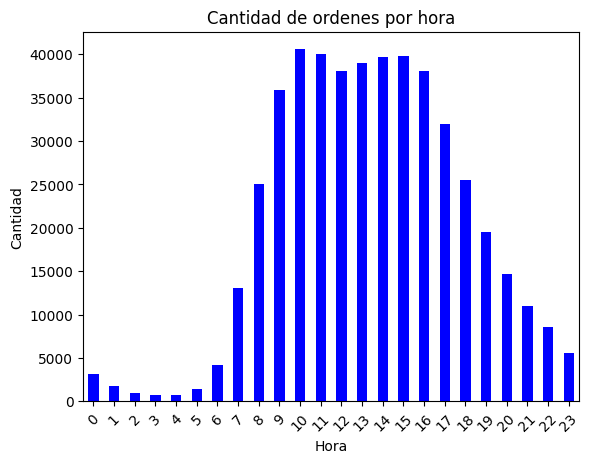

In [36]:
import pandas as pd
from matplotlib import pyplot as plt

orders_df = pd.read_csv('/datasets/instacart_orders.csv', ';')

orders_per_hour = orders_df['order_hour_of_day'].value_counts().sort_index()

orders_per_hour.plot(x='order_hour_of_day',
                     y='orders_per_hour',
                     kind='bar',
                     color='blue',
                     title='Cantidad de ordenes por hora',
                     xlabel='Hora',
                     ylabel='Cantidad',
                     rot=45)

plt.show()


Escribe aquí tus conclusiones
Se puede observar que desde las seis de la manana y hasta las cinco de la tarde se hacen mas ordenes

### [A3] ¿Qué día de la semana compran víveres las personas?

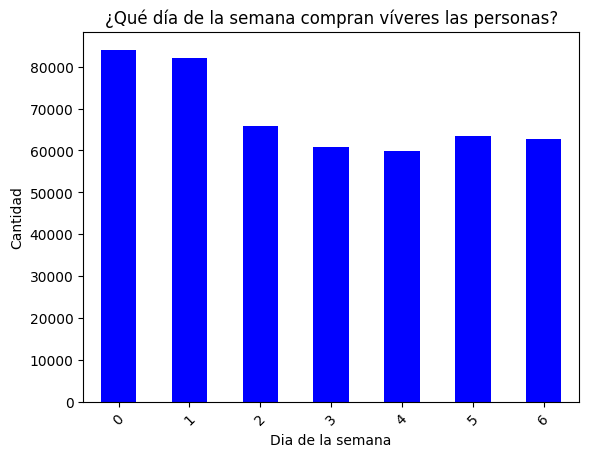

In [38]:
import pandas as pd
from matplotlib import pyplot as plt

orders_df = pd.read_csv('/datasets/instacart_orders.csv', ';')

orders_per_day = orders_df['order_dow'].value_counts().sort_index()

orders_per_day.plot(x='order_dow',
                     y='order_id',
                     kind='bar',
                     color='blue',
                     title='¿Qué día de la semana compran víveres las personas?',
                     xlabel='Dia de la semana',
                     ylabel='Cantidad',
                     rot=45)

plt.show()


Escribe aquí tus conclusiones
Domingo y Lunes son los dias con mayor ingreso de ordenes


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

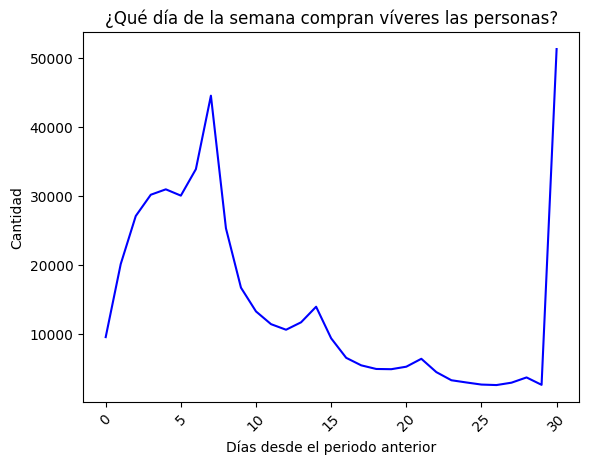

0.0
30.0


In [45]:
import pandas as pd
from matplotlib import pyplot as plt

orders_df = pd.read_csv('/datasets/instacart_orders.csv', ';')

orders_since_prior_orders = orders_df['days_since_prior_order'].value_counts().sort_index()

orders_since_prior_orders.plot(x='orders_since_prior_orders',
                     y='order_id',
                     color='blue',
                     title='¿Qué día de la semana compran víveres las personas?',
                     xlabel='Días desde el periodo anterior',
                     ylabel='Cantidad',
                     rot=45)

plt.show()


min_days=orders_df['days_since_prior_order'].min()
max_days=orders_df['days_since_prior_order'].max()

print(min_days)
print(max_days)

Escribe aquí tus conclusiones
Solo diez mil usuarios aprox hacen una orden subsecuente en los primeros cinco dias mientras qe la mayoria hacen otro epdido pasados los veinituve dias

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

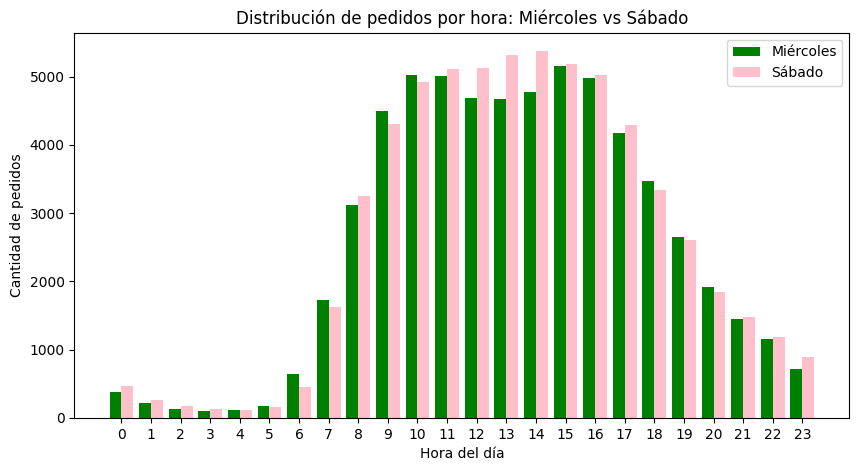

In [48]:
#Filtrar miércoles (order_dow == 3) y sábado (order_dow == 6)
wednesday_orders = orders_df[orders_df["order_dow"] == 3]["order_hour_of_day"]
saturday_orders = orders_df[orders_df["order_dow"] == 6]["order_hour_of_day"]

#Contar pedidos por hora para cada día
wednesday_counts = wednesday_orders.value_counts().sort_index()
saturday_counts = saturday_orders.value_counts().sort_index()

#Graficar ambas distribuciones
plt.figure(figsize=(10, 5))
plt.bar(wednesday_counts.index - 0.2, wednesday_counts.values, width=0.4, label="Miércoles", color="green")
plt.bar(saturday_counts.index + 0.2, saturday_counts.values, width=0.4, label="Sábado", color="pink")

plt.xlabel("Hora del día")
plt.ylabel("Cantidad de pedidos")
plt.title("Distribución de pedidos por hora: Miércoles vs Sábado")
plt.xticks(range(24))  #horas del día (de 0 a 23)
plt.legend()

plt.show()

Escribe aquí tus conclusiones
Los sábados por la mañana hay más ordenes que los miércoles a la misma hora, sin embargo parece que los demás horarios se comportan igual en ambos días.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

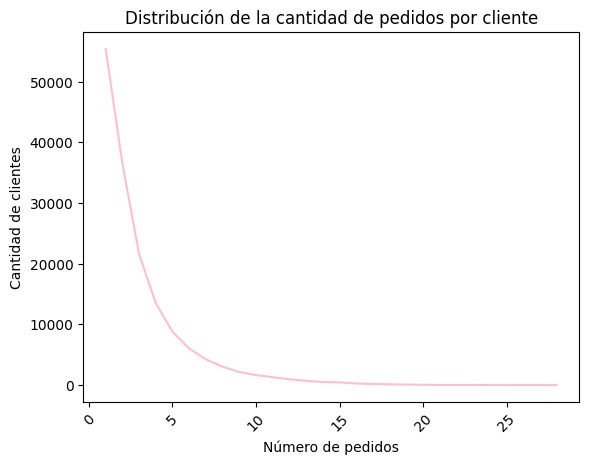

In [49]:
import pandas as pd
from matplotlib import pyplot as plt

orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

#Contar cuántos pedidos hizo cada cliente
customer_orders_count = orders_df.groupby('user_id')['order_id'].nunique()

#Contar la frecuencia de clientes según la cantidad de pedidos que han realizado
orders_count_distribution = customer_orders_count.value_counts().sort_index()

#Graficar la distribución
ax = orders_count_distribution.plot(color='pink', 
                                    title='Distribución de la cantidad de pedidos por cliente', 
                                    xlabel='Número de pedidos', 
                                    ylabel='Cantidad de clientes', 
                                    rot=45)

plt.show()


Escribe aquí tus conclusiones
Hay mas clientes que realizan menos de cinco pedidos y solo una pequena proporcion hace mas de diez pedidos en la plataforma

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [60]:
import pandas as pd
data_path = '/datasets/'
# Cargar el archivo CSV en un DataFrame
products_df = pd.read_csv(data_path + 'products.csv', ';')
orders_df= pd.read_csv(data_path + "order_products.csv",';')

# Contar la cantidad de veces que aparece cada producto
product_counts = orders_df['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'order_count']  # Renombramos columnas

# Unir con el DataFrame de productos para obtener los nombres
top_products = product_counts.merge(products_df, on='product_id')

# Obtener los 20 productos más populares
top_20_products = top_products.head(20)

# Mostrar los resultados
print(top_20_products[['product_id', 'product_name', 'order_count']])

    product_id              product_name  order_count
0        24852                    Banana        66050
1        13176    Bag of Organic Bananas        53297
2        21137      Organic Strawberries        37039
3        21903      Organic Baby Spinach        33971
4        47209      Organic Hass Avocado        29773
5        47766           Organic Avocado        24689
6        47626               Large Lemon        21495
7        16797              Strawberries        20018
8        26209                     Limes        19690
9        27845        Organic Whole Milk        19600
10       27966       Organic Raspberries        19197
11       22935      Organic Yellow Onion        15898
12       24964            Organic Garlic        15292
13       45007          Organic Zucchini        14584
14       39275       Organic Blueberries        13879
15       49683            Cucumber Kirby        13675
16       28204        Organic Fuji Apple        12544
17        5876             O

Escribe aquí tus conclusiones
Los veinte productos mas pedidos son viveres perecederos que ademas son de origen organico

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

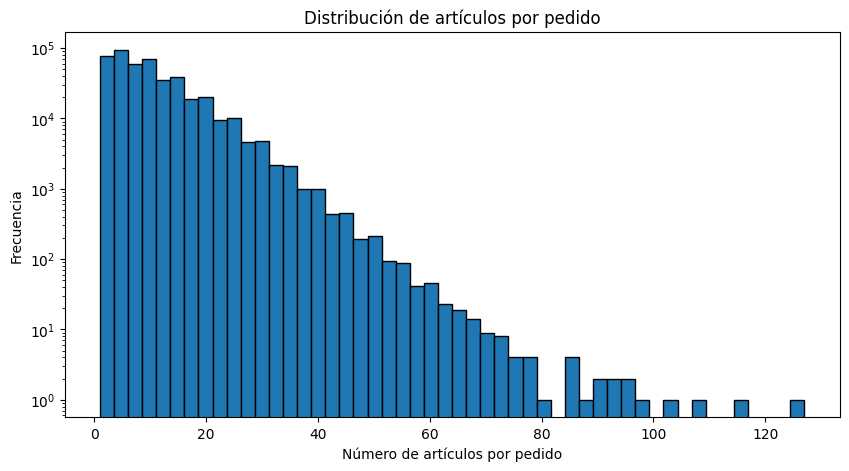

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: order_id, dtype: float64

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

order_products = pd.read_csv(data_path+'order_products.csv',';')

order_counts = order_products['order_id'].value_counts()

plt.figure(figsize=(10, 5))
plt.hist(order_counts, bins=50, edgecolor='black')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución de artículos por pedido')
plt.yscale('log')  
plt.show()
    
order_counts.describe()

Escribe aquí tus conclusiones
El pedido promedio es de diez productos

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [67]:
import pandas as pd

order_products = pd.read_csv(data_path +'order_products.csv',';')
products = pd.read_csv(data_path+'products.csv',';')

reordered_products = order_products[order_products['reordered'] == 1]

top_reordered = reordered_products['product_id'].value_counts().head(20).reset_index()
top_reordered.columns = ['product_id', 'reorder_count']

top_reordered = top_reordered.merge(products[['product_id', 'product_name']], on='product_id')

print(top_reordered)

    product_id  reorder_count              product_name
0        24852          55763                    Banana
1        13176          44450    Bag of Organic Bananas
2        21137          28639      Organic Strawberries
3        21903          26233      Organic Baby Spinach
4        47209          23629      Organic Hass Avocado
5        47766          18743           Organic Avocado
6        27845          16251        Organic Whole Milk
7        47626          15044               Large Lemon
8        27966          14748       Organic Raspberries
9        16797          13945              Strawberries
10       26209          13327                     Limes
11       22935          11145      Organic Yellow Onion
12       24964          10411            Organic Garlic
13       45007          10076          Organic Zucchini
14       49683           9538            Cucumber Kirby
15       28204           8989        Organic Fuji Apple
16        8277           8836  Apple Honeycrisp 

Escribe aquí tus conclusiones
Podemos obserar que los veinte productos que mas se reordenan son productos de necesidad basica, como verduras, frutas, leche.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [68]:
import pandas as pd

order_products = pd.read_csv(data_path+'order_products.csv',';')
products = pd.read_csv(data_path+'products.csv',';')

total_orders = order_products['product_id'].value_counts()

total_reorders = order_products[order_products['reordered'] == 1]['product_id'].value_counts()

reorder_ratio = (total_reorders / total_orders).fillna(0).reset_index()
reorder_ratio.columns = ['product_id', 'reorder_ratio']

reorder_ratio = reorder_ratio.merge(products[['product_id', 'product_name']], on='product_id')

print(reorder_ratio.sort_values(by='reorder_ratio', ascending=False).head(20))

       product_id  reorder_ratio  \
13453       14721            1.0   
19195       20949            1.0   
6136         6723            1.0   
6144         6732            1.0   
41319       45088            1.0   
41310       45078            1.0   
19258       21016            1.0   
19248       21005            1.0   
32273       35192            1.0   
32277       35197            1.0   
6211         6810            1.0   
41274       45040            1.0   
41269       45035            1.0   
25120       27373            1.0   
28203       30748            1.0   
41265       45031            1.0   
32224       35137            1.0   
28202       30747            1.0   
32304       35228            1.0   
32305       35229            1.0   

                                            product_name  
13453                            Bone Strength Take Care  
19195                           Vanilla Sandwich Cookies  
6136                                    Palmiers- Petite  
6144   

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [69]:
import pandas as pd

orders = pd.read_csv(data_path+'instacart_orders.csv',';')
order_products = pd.read_csv(data_path+'order_products.csv',';')

order_products = order_products.merge(orders[['order_id', 'user_id']], on='order_id')

total_products_by_user = order_products.groupby('user_id')['product_id'].count()

reordered_products_by_user = order_products[order_products['reordered'] == 1].groupby('user_id')['product_id'].count()

reorder_ratio_by_user = (reordered_products_by_user / total_products_by_user).fillna(0).reset_index()
reorder_ratio_by_user.columns = ['user_id', 'reorder_ratio']

print(reorder_ratio_by_user.head(20))

    user_id  reorder_ratio
0         2       0.038462
1         4       0.000000
2         5       0.666667
3         6       0.000000
4         7       0.928571
5        11       0.200000
6        12       0.250000
7        13       0.565217
8        14       0.360656
9        15       0.538462
10       16       0.531250
11       17       0.716981
12       19       0.291667
13       20       0.000000
14       21       0.400000
15       22       1.000000
16       24       0.500000
17       26       0.437500
18       27       0.658824
19       28       0.500000


Escribe aquí tus conclusiones
La mayoria de los usuarios reordenan al menos un producto que ya habian pedido

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [70]:
import pandas as pd

order_products = pd.read_csv(data_path+'order_products.csv',';')
products = pd.read_csv(data_path+'products.csv',';')

first_added = order_products[order_products['add_to_cart_order'] == 1]

top_first_added = first_added['product_id'].value_counts().head(20).reset_index()
top_first_added.columns = ['product_id', 'count']

top_first_added = top_first_added.merge(products[['product_id', 'product_name']], on='product_id')

print(top_first_added)

    product_id  count                 product_name
0        24852  15562                       Banana
1        13176  11026       Bag of Organic Bananas
2        27845   4363           Organic Whole Milk
3        21137   3946         Organic Strawberries
4        47209   3390         Organic Hass Avocado
5        21903   3336         Organic Baby Spinach
6        47766   3044              Organic Avocado
7        19660   2336                 Spring Water
8        16797   2308                 Strawberries
9        27966   2024          Organic Raspberries
10       44632   1914   Sparkling Water Grapefruit
11       49235   1797          Organic Half & Half
12       47626   1737                  Large Lemon
13         196   1733                         Soda
14       38689   1397     Organic Reduced Fat Milk
15       26209   1370                        Limes
16       12341   1340                Hass Avocados
17        5785   1310  Organic Reduced Fat 2% Milk
18       27086   1309          

Escribe aquí tus conclusiones
De nuevo, los articulos de necesidad basica son los veinte primeros, lo que hace sentido considerando que es lo que mas se consume en un hogar

### Conclusion general del proyecto:

Ciertos productos son los primeros que los clientes agregan a sus carritos
Hay productos que son agregados primero con mayor frecuencia, lo que nos dicen que son prioritarios para los clientes.
Probablemente, estos productos incluyen básicos de despensa como leche, frutas y verduras.
Algunos clientes repiten casi todos sus productos, mientras que otros pocos prueban cosas nuevas.
Esto sugiere que los clientes tienen hábitos de compra repetitivos, lo que puede ser aprovechado para recomendaciones y promociones personalizadas.
La cantidad de productos en un pedido varía, pero hay tendencias claras en la distribución.
Es probable que la mayoría de los pedidos contengan entre 5 y 20 artículos, con algunos pedidos mucho más grandes.
La informacion recabada en este analisis se podria utilizar para segmentar a los clientes segun sus habitos de consumo, la frecuencia con la que ordenan y el tipo de pedido que hacen, como los que ordenan para su hogar. 